In [50]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_city_data = pd.merge(ride_df, city_df, on="city")
combined_city_data.head()

# Display the data table for preview
combined_city_data.head()





,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

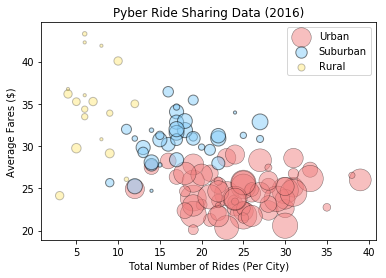

In [51]:
# Obtain the x and y coordinates for each of the three city types
# x = number of riders
# y = Average Fares
# S = circle size - driver count per city

city_data = combined_city_data[["city", "ride_id", "fare", "driver_count"]].groupby(["city"])

city_riders = pd.DataFrame({"Riders": city_data["ride_id"].count()})
avg_fare = pd.DataFrame({"Avg Fare": city_data["fare"].sum() / city_data["ride_id"].count()})

urban = city_df.loc[city_df["type"] == "Urban", :]
suburban = city_df.loc[city_df["type"] == "Suburban", :]
rural = city_df.loc[city_df["type"] == "Rural", :]

urban_rider_df = pd.merge(urban, city_riders, on="city")
urban_df = pd.merge(urban_rider_df, avg_fare, on="city")

suburban_rider_df = pd.merge(suburban, city_riders, on="city")
suburban_df = pd.merge(suburban_rider_df, avg_fare, on="city")

rural_rider_df = pd.merge(rural, city_riders, on="city")
rural_df = pd.merge(rural_rider_df, avg_fare, on="city")

# Build the scatter plots for each city types - ['city', 'driver_count', 'type', 'Riders', 'Avg Fare']
x = urban_df['Riders']
y = urban_df['Avg Fare']
s = urban_df['driver_count'] * 10
plt.scatter(x, y, s, alpha=0.5, c='lightcoral', edgecolors='black', label='Urban', linewidth=.5)

x1 = suburban_df['Riders']
y1 = suburban_df['Avg Fare']
s1 = suburban_df['driver_count'] *10
plt.scatter(x1, y1, s1, alpha=0.5, c='lightskyblue', edgecolors='black', label='Suburban', linewidth=1)

x2 = rural_df['Riders']
y2 = rural_df['Avg Fare']
s2 = rural_df['driver_count'] *10
plt.scatter(x2, y2, s2, alpha=.25, c='gold', edgecolors='black', label='Rural', linewidth=1)


# Incorporate the other graph properties

# Create a legend
plt.legend(loc='best')
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Images/Pyber_Plot.png")
plt.show()



## Total Fares by City Type

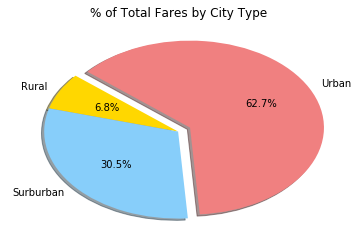

In [52]:
# Calculate Type Percents
city_type_data = combined_city_data[["city", "ride_id", "fare", "driver_count", "type"]].groupby(["type"])

total_fare = combined_city_data["fare"].sum()
#type_total_fare = city_type_data["fare"].sum()
city_type_data_sum = ({"Total Fare": city_type_data["fare"].sum(),
                        "Average Fare": ((city_type_data["fare"].sum() / total_fare) *100).map("{:.2f}".format)})
# Build Pie Chart
pies = ["Rural", "Surburban", "Urban"]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(city_type_data_sum["Average Fare"], explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Pyber_Pie1.png")

#Show Figure
plt.show()

## Total Rides by City Type

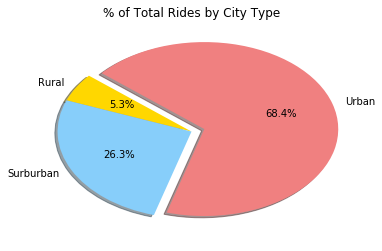

In [53]:

# Calculate Type Percents
city_type_data = combined_city_data[["city", "ride_id", "fare", "driver_count", "type"]].groupby(["type"])

total_rides = combined_city_data["ride_id"].count()


city_rides_data_sum = ({"Total Rides": city_type_data["ride_id"].count(),
                        "Average Rides": ((city_type_data["ride_id"].count() / total_rides) *100)})

# Build Pie Chart
pies = ["Rural", "Surburban", "Urban"]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(city_rides_data_sum["Average Rides"], explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/Pyber_Pie2.png")

#Show Figure
plt.show()

## Total Drivers by City Type

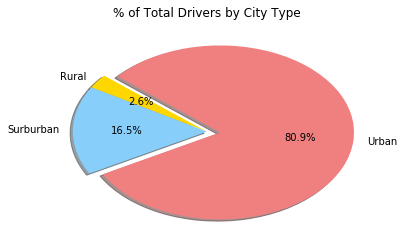

In [54]:
#   city_df - ['city', 'driver_count', 'type']

# Calculate Type Percents
city_type_data = city_df[["city", "driver_count", "type"]].groupby(["type"])

driver_data_sum = ({"Drivers": city_type_data["driver_count"].sum(),
                    "Percent Drivers": ((city_type_data["driver_count"].sum() / total_drivers) * 100)})
# Build Pie Chart

pies = ["Rural", "Surburban", "Urban"]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(driver_data_sum["Percent Drivers"], explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/Pyber_Pie3.png")

#Show Figure
plt.show()